# Caracterización de distancia entre vórtices

En este programa realizamos la conversión correspondiente a la distancia de separación, ya que hay un telescopio después del SLM que reduce la distancia entre los vortices. La foto que se toma en el plano imagen ayuda a tener la distancia de separación real.

In [1]:
# Importación  de librerias
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os 
from pathlib import Path
import pandas as pd

import cv2
from pylab import *             # importar todas las funciones de pylab, en particular poder trabajar
                                # con "xticks" y "yticks"
from scipy.fft import ifftn
from numpy import fft as fft


from scipy.optimize import curve_fit
from matplotlib import gridspec
from matplotlib.patches import Ellipse

import glob


In [3]:
os.getcwd()

'C:\\Users\\Admin\\Documents\\SynologyDrive\\projects\\propagation_of_vortices\\scripts\\Analisis'

In [5]:
general_path = '../../data/Vortices/'

In [94]:
# Rutas donde se encuentran las fotos de los vórtices

# Arreglos de vórtices colineales
ruta2 = general_path + '20241128-2vortices-vs-distancia/'
ruta6 = general_path + '20241015-2vortices-vs-distancia776/'
ruta7 = general_path + '20241015-2vortices-vs-distancia776/2vortices-420/'

ruta31 = general_path + '20250204-3vortices-vs-distancia-420/'
ruta32 = general_path + '20250123-3vortices-vs-distancia-776/'

ruta4 = general_path + '20241202-4vortices-vs-distancia/'
ruta8 = general_path + '20241114-4vortices-vs-distancia/'
ruta9 = general_path + '20241114-4vortices-vs-distancia/776/'

ruta61 = general_path + '20250310-6v-vs-distancia-420nm/'
ruta62 = general_path + '20250303-6v-vs-distancia-776nm/'


# Arreglo cuadrado

ruta4c1 = general_path + '20250210-4vortices-vs-distancia-420/'
ruta4c2 = general_path + '20250212-4vortices-vs-distancia-776/'


In [98]:
# Llamamos todas las fotos en un arreglo definido por su distancia de separación, el número de vortices
#  y la longitud de onda correspondiente.

# Ruta para fotos de 2, 3, 4 y 6 vórtices colineales con una separacion de 30 px
UF_sep30_2vortices420 = np.array(list(sorted(Path(ruta2).glob('2vortices-azul/20241128-2vortices-30px-780-12mW776-12-d*.jpg'))))
UF_sep30_2vortices776 = np.array(list(sorted(Path(ruta2).glob('20241128-2vortices-30px-780-12mW776-12-d*.jpg'))))
UF_sep30_3vortices420 = np.array(list(sorted(Path(ruta31).glob('3V_30px/20250204_420*.jpg'))))
UF_sep30_3vortices776 = np.array(list(sorted(Path(ruta32).glob('3V_30/20250123_776*.jpg'))))
UF_sep30_4vortices420 = np.array(list(sorted(Path(ruta8).glob('20241114_p780-12_p776-12_det-42_T-86_sep30px_d*.jpg'))))
UF_sep30_4vortices776 = np.array(list(sorted(Path(ruta9).glob('20241114_p780-12_p776-12_det-42_T-86_sep30px_d*.jpg'))))
UF_sep30_6vortices420 = np.array(list(sorted(Path(ruta61).glob('30px/20250311-420-6v-30px*.jpg'))))
UF_sep30_6vortices776 = np.array(list(sorted(Path(ruta62).glob('30px/20250303-776-6v-*.jpg'))))

# Ruta para fotos de 2, 3, 4 y 6 vórtices colineales con una separacion de 40 px
UF_sep40_2vortices420 = np.array(list(sorted(Path(ruta7).glob('20241015-2vortices-p78015-p77614-sep40mu-*.png'))))
UF_sep40_2vortices776 = np.array(list(sorted(Path(ruta6).glob('20241015-p776-14-sepX-40mu-d-*.png'))))
UF_sep40_3vortices420 = np.array(list(sorted(Path(ruta31).glob('3V_40px/20250204_420*.jpg'))))
UF_sep40_3vortices776 = np.array(list(sorted(Path(ruta32).glob('3V_40/20250123_776*.jpg'))))
UF_sep40_4vortices420 = np.array(list(sorted(Path(ruta4).glob('4vortices-sep40px-azul-p780-13mW7-p776-13mW-det40MHz-d*.jpg'))))
UF_sep40_4vortices776 = np.array(list(sorted(Path(ruta4).glob('4vortices776/4vortices-sep40px-d*.jpg'))))
UF_sep40_6vortices420 = np.array(list(sorted(Path(ruta61).glob('40px/20250311-420-6v-40px-*.jpg'))))
UF_sep40_6vortices776 = np.array(list(sorted(Path(ruta62).glob('40px/20250303-776-6v-40px-*.jpg'))))

# Ruta para fotos de 2, 3, 4 y 6 vórtices colineales con una separacion de 50 px
UF_sep50_2vortices420 = np.array(list(sorted(Path(ruta4).glob('2vortices-vs-distancia/2vortices-sep50px-azul-p780-13mW-p776-13mW-det40MHz-d*.jpg'))))
UF_sep50_2vortices776 = np.array(list(sorted(Path(ruta4).glob('2vortices-vs-distancia/2vortices-776/2vortices-sep50px-776-d*.jpg'))))
UF_sep50_3vortices420 = np.array(list(sorted(Path(ruta31).glob('3V_50px/20250204_420*.jpg'))))
UF_sep50_3vortices776 = np.array(list(sorted(Path(ruta32).glob('3V_50/20250123_776*.jpg'))))
UF_sep50_4vortices420 = np.array(list(sorted(Path(ruta4).glob('4vortices-sep50px-azul-p780-13mW-p776-13mW-det40MHz-d*.jpg'))))
UF_sep50_4vortices776 = np.array(list(sorted(Path(ruta4).glob('4vortices776/4vortices-sep50px-d*.jpg'))))
UF_sep50_6vortices420 = np.array(list(sorted(Path(ruta61).glob('50px/20250311-420-6v-50px-*.jpg'))))
UF_sep50_6vortices776 = np.array(list(sorted(Path(ruta62).glob('50px/20250303-776-6v-50px-*.jpg'))))


# Ruta para fotos de 4 vórtices en configuración cuadrada
UF_sep30_4vortices776_c = np.array(list(sorted(Path(ruta4c2).glob('30px/20250212-776-4v-30px*.jpg'))))
UF_sep40_4vortices776_c = np.array(list(sorted(Path(ruta4c2).glob('40px/20250212-776-4v-40px*.jpg'))))
UF_sep50_4vortices776_c = np.array(list(sorted(Path(ruta4c2).glob('50px/20250212-776-4v-50px*.jpg'))))
UF_sep30_4vortices420_c = np.array(list(sorted(Path(ruta4c1).glob('4v-30px/20250204_420*.jpg'))))
UF_sep40_4vortices420_c = np.array(list(sorted(Path(ruta4c1).glob('4v-40px/20250212-4v-420nm*.jpg'))))
UF_sep50_4vortices420_c = np.array(list(sorted(Path(ruta4c1).glob('4v-50px/20250212-4v-50px-420nm*.jpg'))))


UF_sep30_4vortices776_c.shape    # verificamos que los arreglos tengan las fotos correspondientes, esto nos permite verificar que la 
                               # ruta es correcta.



(26,)

In [11]:
#Escala de color de Negro a Azul definida como my_cmap3

#plt.figure()
a=np.outer(np.arange(0,1,0.01),np.ones(10))
cdict3 = {'red':   [(0.0,  0.0, 0.0),
                    (0.4,  0.0, 0.0),
                    (0.50,  0.0, 0.0),
                    (1.0, 1.0, 1.0)],
         'green': [(0.0,  0.0, 0.0),
                   (0.4, 0.5, 0.5),
                   (0.70,  1.0, 1.0),
                   (1.0, 1.0, 1.0)],
     'blue':  [(0.0,  0.0, 0.0),
               (0.4,  1.0, 1.0),
               (0.70,  1.0, 1.0),
               (1.0 , 1.0 , 1.0)]} 
my_cmap3 = matplotlib.colors.LinearSegmentedColormap('my_colormap3',cdict3,256)
#plt.imshow(a,aspect='auto', cmap = my_cmap3)                   
#plt.show()

# En esta sección vamos a calcular la distancia entre vórtices en micrometros. Utilizaremos las fotografías que se tomaron en el plano imagen

Los párametros de la camara son:

✧limits = [0,6.66,0,5.32];  Tamaño del sensor de la camara en mm 6.66 ancho x 5.32 alto

✧saturationlim = 255;       Límitede saturación, máxima intensidad permitida.

✧pixels = [1280,1024];      Número de pixeles en uno y el otro eje de la camara.



# 2 vórtices

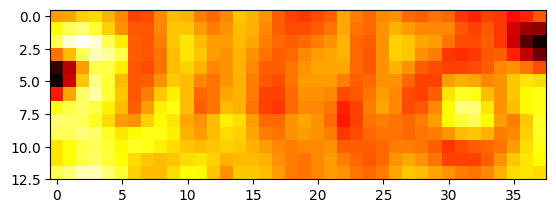

In [16]:
# Distancia de separación de 30 px en el SLM
prueba0 = mpimg.imread(UF_sep30_2vortices776[0]) 
prueba30 = np.array((prueba0),dtype=int)[552:565,506:544][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [18]:
# Hay 38 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s2v_30px = (38*5.2)  # separación de 2 vórtices
s2v_30px

197.6

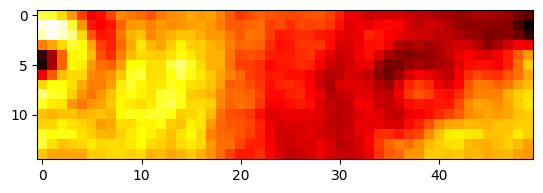

In [20]:
#prueba0 = mpimg.imread(UbicacionFoto[0]) 
prueba0 = mpimg.imread(UF_sep40_2vortices776[0]) 
prueba40 = np.array((prueba0*255),dtype=int)[495:510,632:682][:,:,0]
plt.imshow(prueba40, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [22]:
# Hay 50 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s2v_40px = (50*5.2)  # separación de 2 vórtices
s2v_40px

260.0

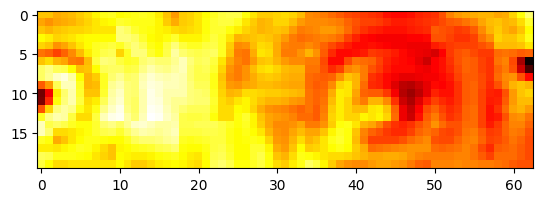

In [24]:
#prueba0 = mpimg.imread(UbicacionFoto[0]) 
prueba0 = mpimg.imread(UF_sep50_2vortices776[0]) 
prueba0 = np.array((prueba0),dtype=int)[570:590,454:517][:,:,0]
plt.imshow(prueba0, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [26]:
# Hay 63 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s2v_50px = (63*5.2)  # separación de 2 vórtices
s2v_50px

327.6

# 3 vórtices

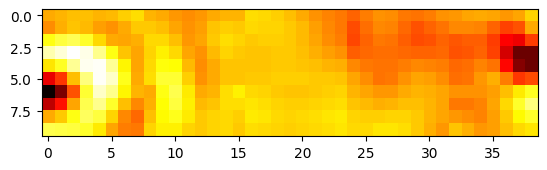

In [29]:
#prueba0 = mpimg.imread(UbicacionFoto[0]) 
prueba0 = mpimg.imread(UF_sep30_3vortices776[0]) 
prueba0 = np.array((prueba0),dtype=int)[530:540,536:575][:,:,0]
plt.imshow(prueba0, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [31]:
# Hay 39 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s3v_30px = (39*5.2)  # separación de 3 vórtices
s3v_30px

202.8

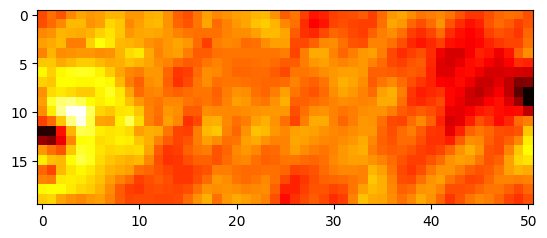

In [33]:
#prueba0 = mpimg.imread(UbicacionFoto[0]) 
prueba0 = mpimg.imread(UF_sep40_3vortices776[0]) 
prueba0 = np.array((prueba0),dtype=int)[540:560,478:529][:,:,0]
plt.imshow(prueba0, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [35]:
# Hay 51 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s3v_40px = (51*5.2)  # separación de 3 vórtices
s3v_40px

265.2

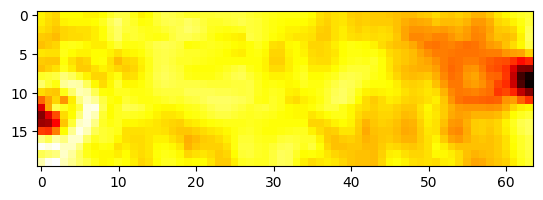

In [37]:
#prueba0 = mpimg.imread(UbicacionFoto[0]) 
prueba0 = mpimg.imread(UF_sep50_3vortices776[0]) 
prueba0 = np.array((prueba0),dtype=int)[540:560,533:597][:,:,0]
plt.imshow(prueba0, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [39]:
# Hay 64 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s3v_50px = (64*5.2)  # separación de 3 vórtices
s3v_50px

332.8

# 4 vórtices

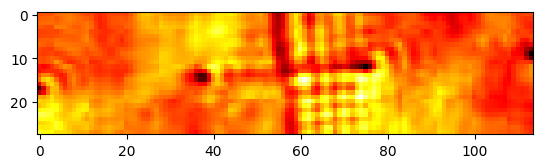

In [42]:
# Distancia de separación entre 4 vórtices   
prueba0 = mpimg.imread(UF_sep30_4vortices776[0]) 
prueba30 = np.array((prueba0),dtype=int)[532:560,316:430][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

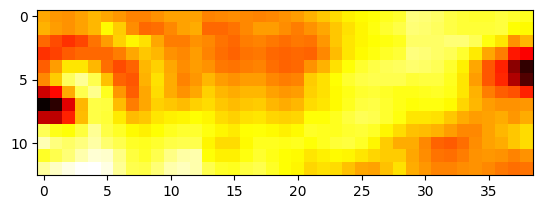

In [44]:
# Distancia de separación entre 4 vórtices   
prueba0 = mpimg.imread(UF_sep30_4vortices776[0]) 
prueba30 = np.array((prueba0),dtype=int)[542:555,315:354][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [46]:
# Hay 39 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s4v_30px = (39*5.2)  # separación de 3 vórtices
s4v_30px

202.8

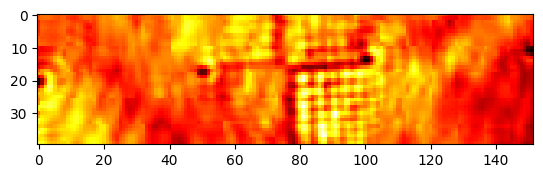

In [48]:
#prueba0 = mpimg.imread(UbicacionFoto[0]) 
prueba0 = mpimg.imread(UF_sep40_4vortices776[0]) 
prueba40 = np.array((prueba0),dtype=int)[550:590,399:551][:,:,0]
plt.imshow(prueba40, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

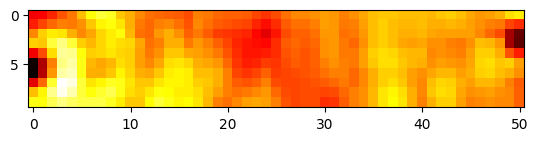

In [50]:
#prueba0 = mpimg.imread(UbicacionFoto[0]) 
prueba0 = mpimg.imread(UF_sep40_4vortices776[0]) 
prueba40 = np.array((prueba0),dtype=int)[565:575,399:450][:,:,0]
plt.imshow(prueba40, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [52]:
# Hay 51 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s4v_40px = (51*5.2)  # separación de 3 vórtices
s4v_40px

265.2

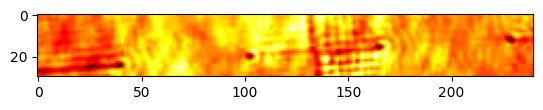

In [54]:
#prueba0 = mpimg.imread(UbicacionFoto[0]) 
prueba0 = mpimg.imread(UF_sep50_4vortices776[0]) 
prueba0 = np.array((prueba0),dtype=int)[560:590,350:590][:,:,0]
plt.imshow(prueba0, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

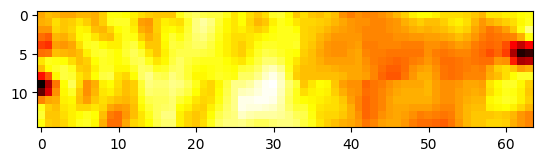

In [56]:
#prueba0 = mpimg.imread(UbicacionFoto[0]) 
prueba0 = mpimg.imread(UF_sep50_4vortices776[0]) 
prueba0 = np.array((prueba0),dtype=int)[575:590,390:454][:,:,0]
plt.imshow(prueba0, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [58]:
# Hay 64 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s4v_50px = (64*5.2)  # separación de 3 vórtices
s4v_50px

332.8

# 6 vórtices

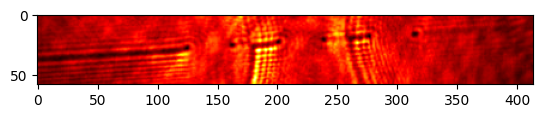

In [61]:
prueba0 = mpimg.imread(UF_sep30_6vortices776[0]) 
prueba30 = np.array((prueba0),dtype=int)[502:560,316:730][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

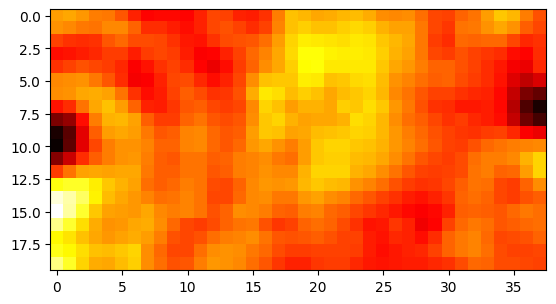

In [63]:
prueba0 = mpimg.imread(UF_sep30_6vortices776[0]) 
prueba30 = np.array((prueba0),dtype=int)[520:540,441:479][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [65]:
# Hay 38 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s6v_30px = (38*5.2)  # separación de 3 vórtices
s6v_30px

197.6

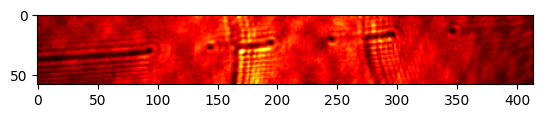

In [67]:
prueba0 = mpimg.imread(UF_sep40_6vortices776[0]) 
prueba30 = np.array((prueba0),dtype=int)[502:560,316:730][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

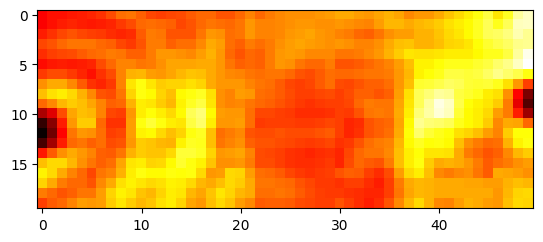

In [69]:
prueba0 = mpimg.imread(UF_sep40_6vortices776[0]) 
prueba30 = np.array((prueba0),dtype=int)[520:540,410:460][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [71]:
# Hay 50 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s6v_40px = (50*5.2)  # separación de 3 vórtices
s6v_40px

260.0

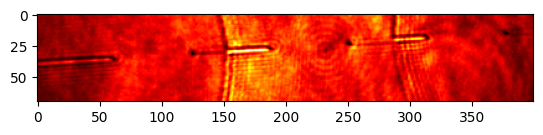

In [73]:
prueba0 = mpimg.imread(UF_sep50_6vortices776[0]) 
prueba30 = np.array((prueba0),dtype=int)[490:560,250:650][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

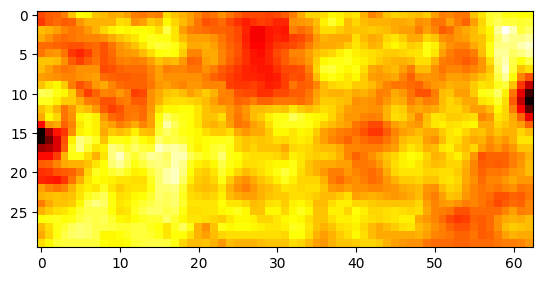

In [75]:
prueba0 = mpimg.imread(UF_sep50_6vortices776[0]) 
prueba30 = np.array((prueba0),dtype=int)[510:540,312:375][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()

In [77]:
# Hay 63 px de separación entre los vortices en la cámara 
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s6v_50px = (63*5.2)  # separación de 3 vórtices
s6v_50px

327.6

# 4 vórtices, cuadrado

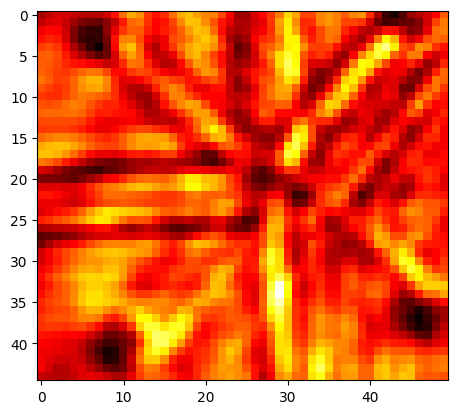

In [116]:
# Distancia de separación entre 4 vórtices   
prueba0 = mpimg.imread(UF_sep30_4vortices776_c[0]) 
prueba30 = np.array((prueba0),dtype=int)[540:585,520:570][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

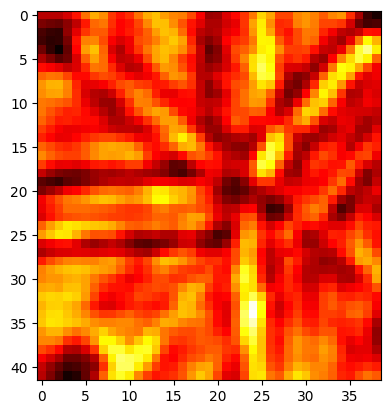

In [130]:
# Distancia de separación entre 4 vórtices   
prueba0 = mpimg.imread(UF_sep30_4vortices776_c[0]) 
prueba30 = np.array((prueba0),dtype=int)[540:582,525:564][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [122]:
# Hay 40 px de separación entre los vortices en la cámara (largo)
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s4v_30px = (40*5.2)  # separación de 3 vórtices
s4v_30px

208.0

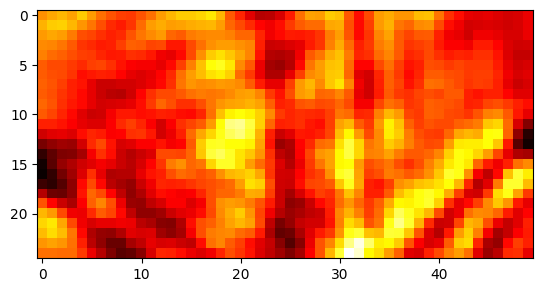

In [168]:
# Distancia de separación entre 4 vórtices   
prueba0 = mpimg.imread(UF_sep40_4vortices776_c[0]) 
prueba30 = np.array((prueba0),dtype=int)[520:545,532:582][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()
#prueba0

In [172]:
# Hay 50 px de separación entre los vortices en la cámara (largo)
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s4v_40px = (50*5.2)  # separación de 3 vórtices
s4v_40px

260.0

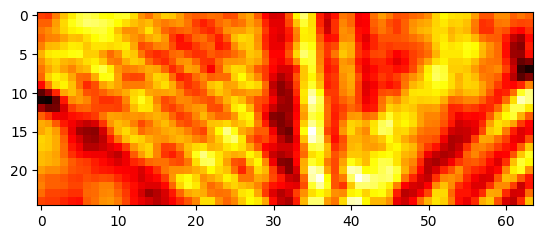

In [180]:
# Distancia de separación entre 4 vórtices   
prueba0 = mpimg.imread(UF_sep50_4vortices776_c[0]) 
prueba30 = np.array((prueba0),dtype=int)[520:545,522:586][:,:,0]
plt.imshow(prueba30, cmap = 'hot')  #tamaño:  (150,150)
plt.show()

In [182]:
# Hay 64 px de separación entre los vortices en la cámara (largo)
# De los parámetros en la cámara se obtiene que cada pixel mide 5.2 µm de lado

s4v_50px = (64*5.2)  # separación de 3 vórtices
s4v_50px

332.8